# Visualization of local dimension esimates computed by the Farahmand-Szepesvari-Audibert estimator
    0. import modules and define helper functions and parameters
    1. Generate uniform random dataset
    2. Estimate local dimension
    3. Compute the theoretical probability density function of the local estimates
    4. Plot the results

## Module imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from cmfsapy.data import gen_ncube
from cmfsapy.dimension.fsa import fsa
from cmfsapy.theoretical import theoretical_fsa_pdf

from constants import f26_size, tagging, tag_kwargs, save_kwargs

%matplotlib inline


def stringadder(a, b):
    """Helper function to formulate string addition over lists (for plotting)

    :param list of str a: a string description of the param
    :param list of int b: an integer value
    :return: list of joined strings
    :rtype: list of str
    """
    return [a[i]+str(b[i]) for i in range(len(a))]

## Define parameters

In [17]:
n_sample = 10000  # sample size
Ds =  [2, 3, 5, 8, 10, 12]  # sample dimension values
ks = [1, 11, 50]  # neighborhood sizes

dw = 0.001
w = np.arange(dw, 200, dw)  # axis for the theoretical pdf

## 1. Generate random uniform dataset

We generate $D$-dimensional random uniform dataset by using the "gen_ncube" function from cmfsapy.data and store the dataset in a dictionary with $D$ values as keys.

In [13]:
data_dict = {}
for D in Ds:
    data_dict[D] = gen_ncube(n_sample, D, 0)

## 2. Measure local dimension estimates
We compute the local FSA estimates on the dataset and store the results for the selected neighborhood sizes.

In [14]:
dims_dict = {}
for D in Ds:
    d = fsa(data_dict[D], max(ks), boxsize=1)[0][:, ks]
    dims_dict[D] = d

/home/phrenico/Projects/Codes/cmfsapy/src/cmfsapy/dimension/fsa.py:19: RuntimeWarning: invalid value encountered in true_divide
  d = - np.log(2) / np.log(dists[:, lower_k] / dists[:, upper_k])


## 3. Compute theoretical probability density function

We calculate the probability density for the given parameters for later comparison with empirical data.

In [18]:
theor_dict = {}
for D in Ds:
    dims_theor = np.array([theoretical_fsa_pdf(w, i, D) for i in ks]).T
    theor_dict[D] = dims_theor

## 4. Plot the results

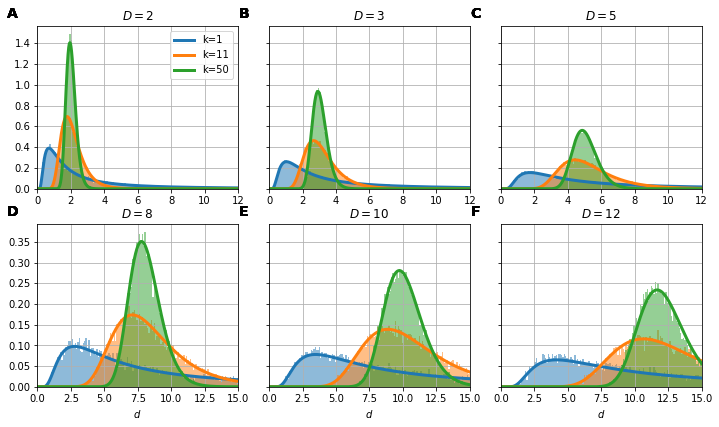

In [23]:
f, axs = plt.subplots(2, 3, figsize=(10, 6), sharey='row')
axs = np.array(axs).flatten()
bins = np.arange(-0.5, 100, 0.1)

for cycler, D in enumerate(Ds):
    myax = axs[cycler]
    dims_theor = theor_dict[D]
    d = dims_dict[D]


    myax.plot(w, dims_theor, linewidth=3.)

    myax.set_prop_cycle(None)
    for i, myk in enumerate(ks):
        _ = myax.hist(d[:, i], density=True, bins=bins, alpha=0.5)

    if D < 6:
        myax.set_xlim([0, 12])
    else:
        myax.set_xlim([0, 15])

    myax.grid(True)
    if D == 2:
        myax.legend(stringadder(['k=', 'k=', 'k='], np.array(ks)))

# f.suptitle('Theory vs. Simulations on Random uniforn n-cube \n $n$={}, periodic boundary'.format(n))
_ = [ax.set_xlabel(r'$d$') for ax in axs[[3, 4, 5]]]

for i in range(len(axs)):
    axs[i].set_title(r'$D={}$'.format(Ds[i]))
    [axs[i].text(-0.15, 1.05, tagging[i], transform=axs[i].transAxes, **tag_kwargs) for i in range(len(axs))]
f.tight_layout(rect=[0, 0, 1, 1], pad=1, h_pad=0, w_pad=0)